In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec
import re
import bs4 as bs
import urllib.request
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
scrapped_data=urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article=scrapped_data.read()
paresed_article=bs.BeautifulSoup(article,'lxml')
paragraphs=paresed_article.find_all('p')
article_text=""
for p in paragraphs:
  article_text+=p.text
sentences=article_text
print(article_text)


sentences="""Alice 23 opened the door and found that it led into a
small 90
passage, not much larger than a rat-hole: she knelt down and
looked along the passage into the loveliest garden you ever saw.
How she longed to get out of that dark hall, and wander about
among those beds of bright flowers and those cool fountains, but
she could not even get her head through the doorway; `and even if
my head would go through,' (thought) $poor Alice, `it would be of
very little use without my shoulders. Oh, how I wish
I could shut up like a telescope! I think I could, if I only
know how to begin.' For, you see, so many out-of-the-way things
had happened lately, that Alice had begun to think that very few
things indeed were really impossible.
"""
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
print(sentences)

Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.[1] Quick progress in the field of deep learning, beginning in 2010s, allowed neural networks to surpass many previous approaches in performance.[2]
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[3][4] The application of ML to business problems is known as predictive analytics.
Statistics and mathematical optimization (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning.[6][7]
From a theoretical viewpoint, probably approximately correct (PAC) learning provides a framework for describing machine learni

{'could': 0, 'alice': 1, 'passage': 2, 'think': 3, 'things': 4, 'even': 5, 'head': 6, 'get': 7, 'would': 8, 'ever': 9, 'saw': 10, 'longed': 11, 'indeed': 12, 'dark': 13, 'loveliest': 14, 'hall': 15, 'wander': 16, 'among': 17, 'garden': 18, 'looked': 19, 'along': 20, 'bright': 21, 'knelt': 22, 'hole': 23, 'rat': 24, 'larger': 25, 'much': 26, 'small': 27, 'led': 28, 'found': 29, 'door': 30, 'opened': 31, 'beds': 32, 'fountains': 33, 'flowers': 34, 'wish': 35, 'lately': 36, 'happened': 37, 'way': 38, 'many': 39, 'see': 40, 'begin': 41, 'know': 42, 'telescope': 43, 'like': 44, 'shut': 45, 'oh': 46, 'cool': 47, 'shoulders': 48, 'without': 49, 'use': 50, 'little': 51, 'poor': 52, 'thought': 53, 'go': 54, 'doorway': 55, 'really': 56, 'begun': 57, 'impossible': 58}
beds: 0.36491504311561584
much: 0.3305249512195587
shut: 0.32979297637939453
cool: 0.25908932089805603
wish: 0.243193581700325
oh: 0.24176433682441711
begun: 0.2212926298379898
begin: 0.17681987583637238
loveliest: 0.142790943384170

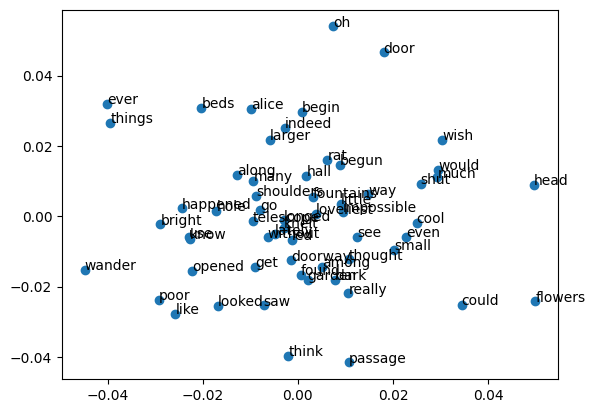

In [ ]:
import re
import nltk
import gensim
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

# Step 1: Clean the text data
# Remove special characters
sentences = re.sub('[^A-Za-z]+', ' ', sentences)

# Remove single-letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# Convert all characters to lowercase
sentences = sentences.lower()

# Tokenize sentences and words using NLTK
all_sent = nltk.sent_tokenize(sentences)
all_words = [nltk.word_tokenize(sent) for sent in all_sent]

# Step 2: Remove stopwords from the tokenized words
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

data = all_words
data1 = data[0]  # First sentence for demonstration

# Step 3: Build the Word2Vec model
model1 = gensim.models.Word2Vec(data, min_count=1, vector_size=52, window=5)

# Access the vocabulary using .key_to_index (Gensim 4.0+)
vocabulary = model1.wv.key_to_index
print(vocabulary)

# Find similar words to a given word
rd = 'door'
similar_words = model1.wv.most_similar(rd)
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

# Step 4: Prepare context-target pairs for training (context window of 2)
dat = []
for i in range(2, len(data1) - 2):
    context = [data1[i - 2], data1[i - 1], data1[i + 1], data1[i + 2]]
    target = data1[i]
    dat.append((context, target))
print(dat[:5])  # Print the first 5 context-target pairs

# Step 5: Visualize word embeddings using PCA
X = model1.wv.vectors  # Word vectors
pca = PCA(n_components=2)  # Ensure PCA is imported
result = pca.fit_transform(X)

# Plot the 2D PCA projection of the word embeddings
plt.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.key_to_index)  # List of words in the vocabulary
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
